# Analysis of temperature trends at DCA Reagan National Airport over last 77 years¶

### Everyone is aware of global worming caused by the increased CO2 content and CH4 content in our atmosphere, the former being caused by the combustion of fossile fuels and the latter being caused by thawing of tundra, natural gas flares and raising of livestock.  It is also well known that the international community (i.e. the Paris Agreement of 2015) strives to limit global warming to about 1.5 Celsius degrees (i.e. 2.7 Fahrenheit degrees) as compared to pre-industrial levels.  

### This project looks at temperature changes at Washington, DC's Reagan National Airport (aka DCA) over the last 77 years.  I graph out the average highs and average lows for each month over the 77 year period to see if certain months have larger temperature increases over others, and whether any patterns or conclusions can be drawn from the graphs.  I also examine extreme highs and lows, and see whether global warming manifests in the frequency of extreme temperatures.

### The key upshot of the project can quickly be gleaned by focussing on the trend of each graph presented below -- is the trend line horizontal, is it barely upsloping or is it significantly upsloping over the 77 year period.  This will tell you whether the feature being examined manifests no global warming, small global warming or an outsized global warming effect respectively over the 78 year period.
   
### The data was imported from the National Centers for Environmental Information of NOAA (i.e. the National Weather Service)

## After downloading data to my local PC, I now read it in and inspect it.

In [30]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Matthew\\Desktop\\datasets\\Washdctemps\\reamaster.csv')
print(df.head())

       STATION                                       NAME      DATE  TAVG  \
0  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US  07/01/45   NaN   
1  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US  07/02/45   NaN   
2  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US  07/03/45   NaN   
3  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US  07/04/45   NaN   
4  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US  07/05/45   NaN   

   TMAX  TMIN  
0    99    76  
1    93    70  
2    82    65  
3    83    65  
4    85    70  


### I now explore the read in data 

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28002 entries, 0 to 28001
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  28002 non-null  object 
 1   NAME     28002 non-null  object 
 2   DATE     28002 non-null  object 
 3   TAVG     5743 non-null   float64
 4   TMAX     28002 non-null  int64  
 5   TMIN     28002 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ MB
None


### do note that the date column is object type. This will have to be converted to datetime.  Nevertheless, the columns I am interested in ('TMIN' and 'TMAX') do not seem to have any null values.  

In [32]:
print(df.shape)

(28002, 6)


In [33]:
print(df.describe())

              TAVG          TMAX          TMIN
count  5743.000000  28002.000000  28002.000000
mean     59.236636     66.942040     49.501536
std      16.831708     18.092362     16.667186
min       0.000000      8.000000     -5.000000
25%      46.000000     52.000000     36.000000
50%      60.000000     69.000000     49.000000
75%      75.000000     83.000000     65.000000
max      93.000000    105.000000     84.000000


### the values for TMIN and TMAX seem well behaved without any outrageous outliers

In [34]:
print(df['TMIN'].value_counts())

 72    682
 70    638
 69    634
 65    629
 67    624
      ... 
 84      3
-4       2
 83      2
-5       1
-2       1
Name: TMIN, Length: 86, dtype: int64


### convert DATE column to datetime

In [35]:

df2 = df
df2['DATE'] = pd.to_datetime(df['DATE'])

print(df2.shape)
print(df.info())
print(df2.head(90))

(28002, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28002 entries, 0 to 28001
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  28002 non-null  object        
 1   NAME     28002 non-null  object        
 2   DATE     28002 non-null  datetime64[ns]
 3   TAVG     5743 non-null   float64       
 4   TMAX     28002 non-null  int64         
 5   TMIN     28002 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.3+ MB
None
        STATION                                       NAME       DATE  TAVG  \
0   USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 2045-07-01   NaN   
1   USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 2045-07-02   NaN   
2   USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 2045-07-03   NaN   
3   USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 2045-07-04   NaN   
4   USW00013743  WASHINGTON REAGAN NATIO

### I noticed from the above that dates prior to about 1970 are automatically converted to be in the future by pandas to_datetime function. The code below corrects this

In [36]:
date_separator = pd.to_datetime("20250101")
century = pd.DateOffset(years=100)
before_separator = df2['DATE'] > date_separator
df2.loc[before_separator , 'DATE'] = df2['DATE'] - century
print(df2.head())

       STATION                                       NAME       DATE  TAVG  \
0  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-07-01   NaN   
1  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-07-02   NaN   
2  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-07-03   NaN   
3  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-07-04   NaN   
4  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-07-05   NaN   

   TMAX  TMIN  
0    99    76  
1    93    70  
2    82    65  
3    83    65  
4    85    70  


### new columns 'month' and 'year' are created from the 'DATE column to store integer values to aid subsequent processing

In [37]:
df2['year'] = df2['DATE'].dt.year
df2['month'] = df2['DATE'].dt.month
print(df2.head())
print(df2.tail())

       STATION                                       NAME       DATE  TAVG  \
0  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-07-01   NaN   
1  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-07-02   NaN   
2  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-07-03   NaN   
3  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-07-04   NaN   
4  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-07-05   NaN   

   TMAX  TMIN  year  month  
0    99    76  1945      7  
1    93    70  1945      7  
2    82    65  1945      7  
3    83    65  1945      7  
4    85    70  1945      7  
           STATION                                       NAME       DATE  \
27997  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 2022-02-24   
27998  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 2022-02-25   
27999  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 2022-02-26   
28000  USW00013743  WASHINGTON REAGAN NATIONAL AIRPOR

### The analysis of the data begins. First, I will see how the average of the daily mean changed over the 77 years to get anidea of the overall temp increase, and then I will plot the annual mean of the daily highs and daily lows to see which one had the greatest increase in temperature

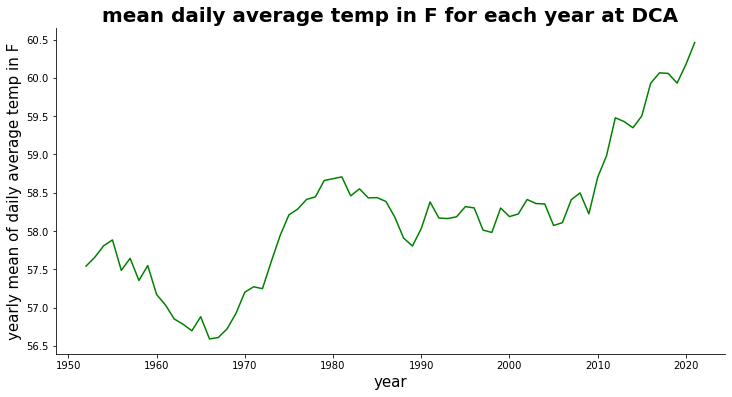

In [38]:
import matplotlib.pyplot as plt
import numpy as np
dffull = df2[(df2['year'] > 1945) & (df2['year'] < 2022)]
dfext = (dffull.groupby(['year'])['TMAX'].mean() + dffull.groupby(['year'])['TMIN'].mean())/2.0
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(dfext.index, dfext.rolling(7).mean(), c='green')
ax.set_ylabel ('yearly mean of daily average temp in F', size = 15)
ax.set_xlabel ('year', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("mean daily average temp in F for each year at DCA", size=20, weight='bold')
plt.show()

### it appears that temperatures overall increased by about 2.5 Fahrenheit degrees at DCA from the end of WW II to today, suggesting that Washington DC has approached the 2015 Paris Agreement limit of 2.7 Fahrenheit degrees.

### Instead of the daily mean, lets see how the daily high temps vary over the 78 year period

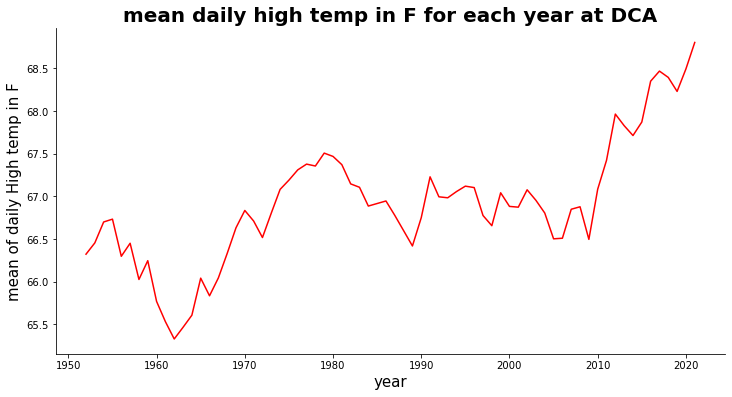

In [39]:
import matplotlib.pyplot as plt
import numpy as np
dffull = df2[(df2['year'] > 1945) & (df2['year'] < 2022)]
dfext = dffull.groupby(['year'])['TMAX'].mean()
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(dfext.index, dfext.rolling(7).mean(), c='red')
ax.set_ylabel ('mean of daily High temp in F', size = 15)
ax.set_xlabel ('year', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("mean daily high temp in F for each year at DCA", size=20, weight='bold')
plt.show()

### daily highs seemed to increase by only about 1.5 Fahrenheit degrees in this period
### finally lets look at how daily lows vary

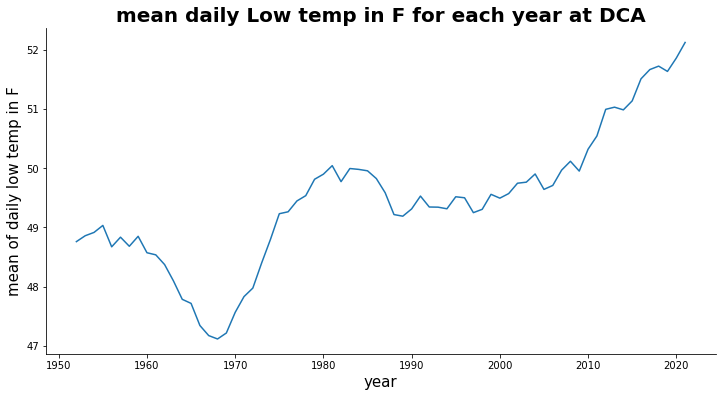

In [40]:
import matplotlib.pyplot as plt
import numpy as np
dffull = df2[(df2['year'] > 1945) & (df2['year'] < 2022)]
dfext = dffull.groupby(['year'])['TMIN'].mean()
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(dfext.index, dfext.rolling(7).mean())
ax.set_ylabel ('mean of daily low temp in F', size = 15)
ax.set_xlabel ('year', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("mean daily Low temp in F for each year at DCA", size=20, weight='bold')
plt.show()

### however daily lows seemed to have increased by about 3 Fahrenheit degrees over this 77 year period, suggesting that an outsized proportion of the global warming is reflected in the daily minimum temperatures 


### With that, I will now focus on the coldest months of the year for df3, that being Dec thru Feb.  This presents a small problem because December is of a different year than Jan and Feb.  I'll remedy this issue by adding a new column called 'season' to allow for December to be grouped in the same season as Jan and Feb of the next calendar year

In [41]:
df3 = df2.loc[(df2['month'] == 12) | (df2['month'] < 3)]
pd.options.mode.chained_assignment = None  # default='warn'
df3['season'] = df3.apply(lambda x: f"{x['year']-1}/{x['year']}" if x['month'] <= 2 else f"{x['year']}/{x['year']+1}", axis=1)
print(df3.head())
print(df3.tail())

         STATION                                       NAME       DATE  TAVG  \
153  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-12-01   NaN   
154  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-12-02   NaN   
155  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-12-03   NaN   
156  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-12-04   NaN   
157  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 1945-12-05   NaN   

     TMAX  TMIN  year  month     season  
153    43    32  1945     12  1945/1946  
154    48    30  1945     12  1945/1946  
155    44    38  1945     12  1945/1946  
156    44    36  1945     12  1945/1946  
157    36    31  1945     12  1945/1946  
           STATION                                       NAME       DATE  \
27997  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 2022-02-24   
27998  USW00013743  WASHINGTON REAGAN NATIONAL AIRPORT, VA US 2022-02-25   
27999  USW00013743  WASHINGTON REAGAN N

In [42]:
meeny = df3.groupby(['season'])['TMIN'].mean()

### I now proceed to calculate the average low temperature in Fahrenheit for each winter season of Dec 1 to Feb 28 for each season from 1945/1946 to 2021/2022 and print and then plot the results

In [43]:
print(meeny)

season
1945/1946    29.200000
1946/1947    29.888889
1947/1948    26.296703
1948/1949    34.044444
1949/1950    34.988889
               ...    
2017/2018    31.755556
2018/2019    33.755556
2019/2020    35.197802
2020/2021    32.544444
2021/2022    32.955556
Name: TMIN, Length: 77, dtype: float64


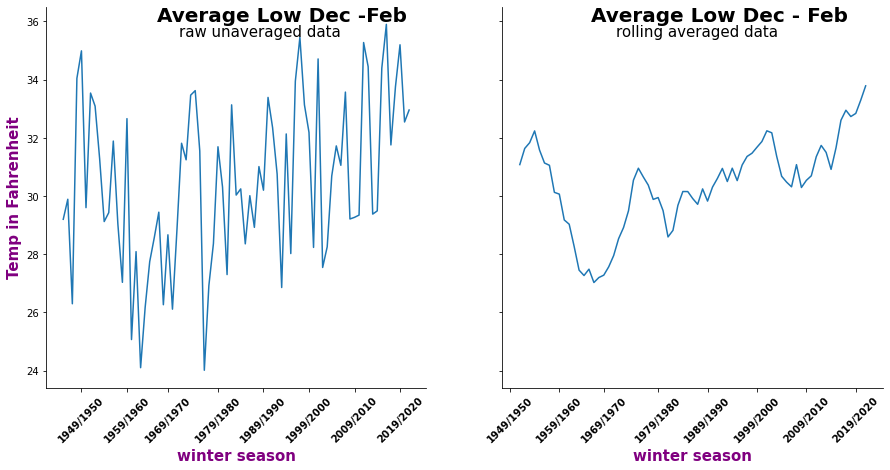

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
ax[0].plot(meeny.index, meeny)
ax[1].plot(meeny.index, meeny.rolling(7).mean())

ax[0].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[0].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
#ax[0].set_yticks([28, 30, 32, 34, 36])
#ax[0].set_yticklabels([28, 30, 32, 34, 36], weight = 'bold')
ax[0].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('Temp in Fahrenheit', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (raw) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[1].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
#ax[1].set_yticks([28, 30, 32, 34, 36])
#ax[1].set_yticklabels([28, 30, 32, 34, 36], weight = 'bold')
ax[1].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
#ax[1].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (rolling averaged) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[0].text(x=20.5, y=36, s='Average Low Dec -Feb',
        size=20, weight='bold')
ax[0].text(x=25.5, y=35.5, s='raw unaveraged data',
        size=15)
ax[1].text(x=20.5, y=36, s='Average Low Dec - Feb',
        size=20, weight='bold')
ax[1].text(x=25.5, y=35.5, s='rolling averaged data',
        size=15)
plt.show()

## There seems to be a wide variance in the average winter seasononal daily low temperature making it difficult to determine how much of an increase it had over the 77 year period.  Even after applying a 7 year rolling average as in the above right graph, it is difficult to determine the increase of winter nightly average lows over the 77 year period.  


## Now, I will focus on the number of nightly lows each season that dropped below a certain threshold. I played around and it seemed that a threshold of 20F gave significant data

In [45]:
below20 = df3.groupby('season')['TMIN'].apply(lambda x: x[x < 20.0].count())
dffull2 = df2[(df2['year'] > 1945) & (df2['year'] < 2022)]
above90 = dffull2.groupby('year')['TMAX'].apply(lambda x: x[x > 90.0].count())

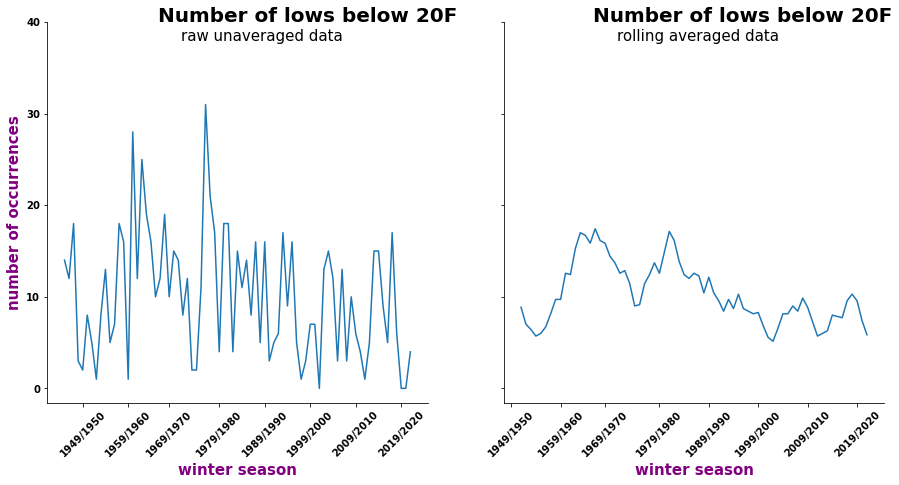

In [46]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
ax[0].plot(below20.index, below20)
ax[1].plot(below20.index, below20.rolling(7).mean())

ax[0].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[0].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
ax[0].set_yticks([0, 10, 20, 30, 40])
ax[0].set_yticklabels([0, 10, 20, 30, 40], weight = 'bold')
ax[0].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (raw) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)



ax[1].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[1].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
ax[1].set_yticks([0, 10, 20, 30, 40])
ax[1].set_yticklabels([0, 10, 20, 30, 40], weight = 'bold')
ax[1].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
#ax[1].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (rolling averaged) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[0].text(x=20.5, y=40, s='Number of lows below 20F',
        size=20, weight='bold')
ax[0].text(x=25.5, y=38, s='raw unaveraged data',
        size=15)
ax[1].text(x=20.5, y=40, s='Number of lows below 20F',
        size=20, weight='bold')
ax[1].text(x=25.5, y=38, s='rolling averaged data',
        size=15)
plt.show()




### data and graphs above seemed to show a steady drop in the occurrences of  winter nightly lows well below the norm.  Due the the high fluctuation, a rolling mean is appied to the right graph to try to clarify the results. 

### Lets now address the opposite side of the coin -- the number of daily highs per summer season that exceed some threshold, say 90F


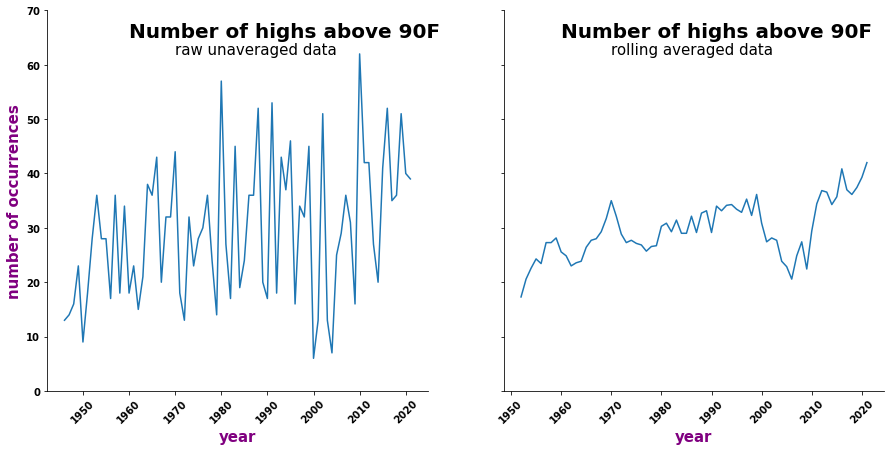

In [47]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
ax[0].plot(above90.index, above90)
ax[1].plot(above90.index, above90.rolling(7).mean())

ax[0].set_xticks([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
ax[0].set_xticklabels([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], rotation = 45, weight = 'bold')
ax[0].set_yticks([0, 10, 20, 30, 40, 50, 60, 70])
ax[0].set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70], weight = 'bold')
ax[0].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (raw) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)



ax[1].set_xticks([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
ax[1].set_xticklabels([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], rotation = 45, weight = 'bold')
ax[1].set_yticks([0, 10, 20, 30, 40, 50, 60, 70])
ax[1].set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70], weight = 'bold')
ax[1].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')
#ax[1].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (rolling averaged) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].text(x=1960, y=65, s='Number of highs above 90F',
        size=20, weight='bold')
ax[0].text(x=1970, y=62, s='raw unaveraged data',
        size=15)
ax[1].text(x=1960, y=65, s='Number of highs above 90F',
        size=20, weight='bold')
ax[1].text(x=1970, y=62, s='rolling averaged data',
        size=15)

plt.show()


### As can be seen above, the number of daily highs exceeding 90F has dramatically increased over the last 77 years, indicating that the warmer months at DCA are experiencing an outsized global warming effect 

## now I will calculate and plot the average nightly lows for each year for the coldest month of the year (January) and the warmest month of the year (July) to see how they compare

In [48]:
jandat = df2[df2['month'] == 1]
#print(janmin)
dfjanminmean = jandat.groupby(['year'])['TMIN'].mean()
print (dfjanminmean)

year
1946    29.709677
1947    33.774194
1948    21.967742
1949    34.677419
1950    38.903226
          ...    
2018    26.677419
2019    30.096774
2020    34.967742
2021    31.709677
2022    27.193548
Name: TMIN, Length: 77, dtype: float64


In [49]:
juldat = df2[df2['month'] == 7]
#print(janmin)
dfjulminmean = juldat.groupby(['year'])['TMIN'].mean()
#print (dfjulminmean)

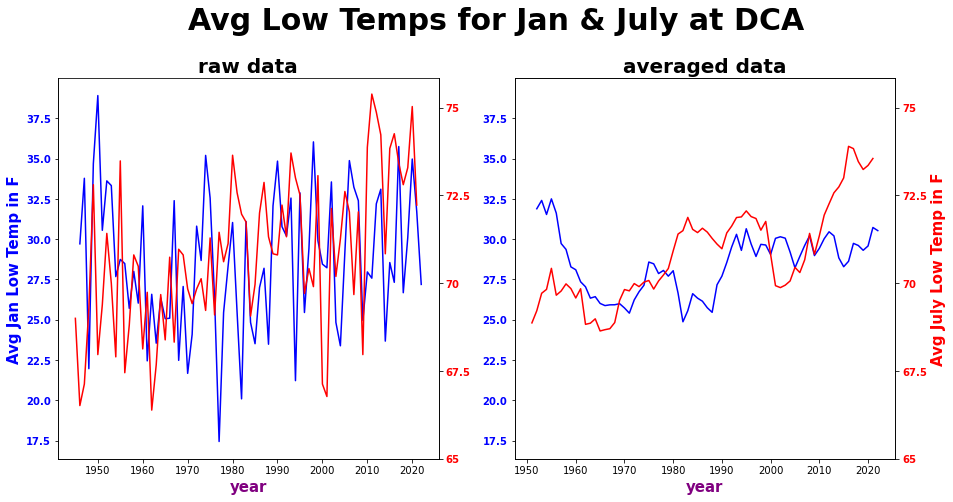

In [50]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].plot(dfjanminmean.index, dfjanminmean, color='blue')

# Create a twin Axes that shares the x-axis
ax2 = np.array([a.twinx() for a in ax.ravel()]).reshape(ax.shape)


# Plot the relative temperature in red
ax2[0].plot(dfjulminmean.index, dfjulminmean,color='red')
# Plot the CO2 variable in blue
ax[1].plot(dfjanminmean.index, dfjanminmean.rolling(7).mean(), color='blue')

ax[0].set_yticks([17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0, 37.5])
ax[0].set_yticklabels([17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0, 37.5], weight = 'bold', c = 'blue')
ax2[0].set_yticks([65, 67.5, 70, 72.5, 75])
ax2[0].set_yticklabels([65, 67.5, 70, 72.5, 75], weight = 'bold', c = 'red')
ax[0].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('Avg Jan Low Temp in F', c = 'blue', size = 15, weight = 'bold')
ax2[1].set_ylabel ('Avg July Low Temp in F', c = 'red', size = 15, weight = 'bold')

ax2[1].plot(dfjulminmean.index, dfjulminmean.rolling(7).mean(),color='red')
ax2[0].get_shared_y_axes().join(ax2[0], ax2[1])
ax[0].get_shared_y_axes().join(ax[0], ax[1])


ax[1].set_yticks([17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0, 37.5])
ax[1].set_yticklabels([17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0, 37.5], weight = 'bold', c = 'blue')
ax2[1].set_yticks([65, 67.5, 70, 72.5, 75])
ax2[1].set_yticklabels([65, 67.5, 70, 72.5, 75], weight = 'bold', c = 'red')
ax[1].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')

ax[0].spines['top'].set_visible(False)

ax[0].set_title("raw data", size=20, weight='bold')
ax[1].set_title("averaged data", size=20, weight='bold')

ax[0].text(x=1970, y=43, s='Avg Low Temps for Jan & July at DCA', size=30, weight='bold')


plt.show()

## Suprisingly, it appears that the average nightly lows for July have increased as much or more over the 77 year period as compared to the average nightly lows for January.  It appears that I may have been focussed too much on the lack of extreme low temperatures as a manifestation of global warming in Washington DC.  To the contrary, it is the warmer months in Washington DC that seem to exhibit and outsized increase of temperature over the 77 year period.


### I will now plot the average low for each month and the average high for each month for each year for the 1945 to 2022 time frame.  I will then use Seaborn's FacetGrid function to make a grid plot of these 24 graphs (12 months * min and max variants).  This will involve a groupby call for each of Min and Max temps, a merging of these two dataframes, and the use of the FacetGrid function to make the 24 plots.  Before merging, column names for TMAX and TMIX will each become 'temp', a flag column 'attr' will be formed that tells whether the temperature listed in the temp column is a high or a low temp.

### The 24 graphs will show how the daily lows and the daily highs for each month have varied over the last 77 years.  A horizontal graph will indicate no change in temperature, and an inclined graph will indicate warming thru the period.  By placing all 24 plots side by side, comparison can easily be made as to which months and which attribute (daily temperature highs or lows) experienced the greatest increase in temperature.  

In [51]:
#min data frame is formed
dfmonmin = df2.groupby(['year', 'month'])['TMIN'].mean()
dflow = dfmonmin.reset_index()
dflow['attr'] = 'mintemp'
dflow.rename(columns = {'TMIN': 'temp'}, inplace = True)
print(dflow.head())


   year  month       temp     attr
0  1945      7  69.000000  mintemp
1  1945      8  65.870968  mintemp
2  1945      9  64.900000  mintemp
3  1945     10  47.483871  mintemp
4  1945     11  41.266667  mintemp


In [52]:
#max temp data frame is formed
dfmonmax = df2.groupby(['year', 'month'])['TMAX'].mean()
dfhigh = dfmonmax.reset_index()
dfhigh['attr'] = 'maxtemp'
dfhigh.rename(columns = {'TMAX': 'temp'}, inplace = True)
print(dfhigh.head())

   year  month       temp     attr
0  1945      7  84.193548  maxtemp
1  1945      8  83.903226  maxtemp
2  1945      9  80.700000  maxtemp
3  1945     10  67.838710  maxtemp
4  1945     11  57.866667  maxtemp


In [53]:
#merging occurs
import pandas as pd
concat_df = pd.concat([dflow, dfhigh], axis = 0, ignore_index = True)
print(concat_df.tail())

      year  month       temp     attr
1835  2021     10  74.032258  maxtemp
1836  2021     11  57.000000  maxtemp
1837  2021     12  55.677419  maxtemp
1838  2022      1  41.967742  maxtemp
1839  2022      2  53.142857  maxtemp


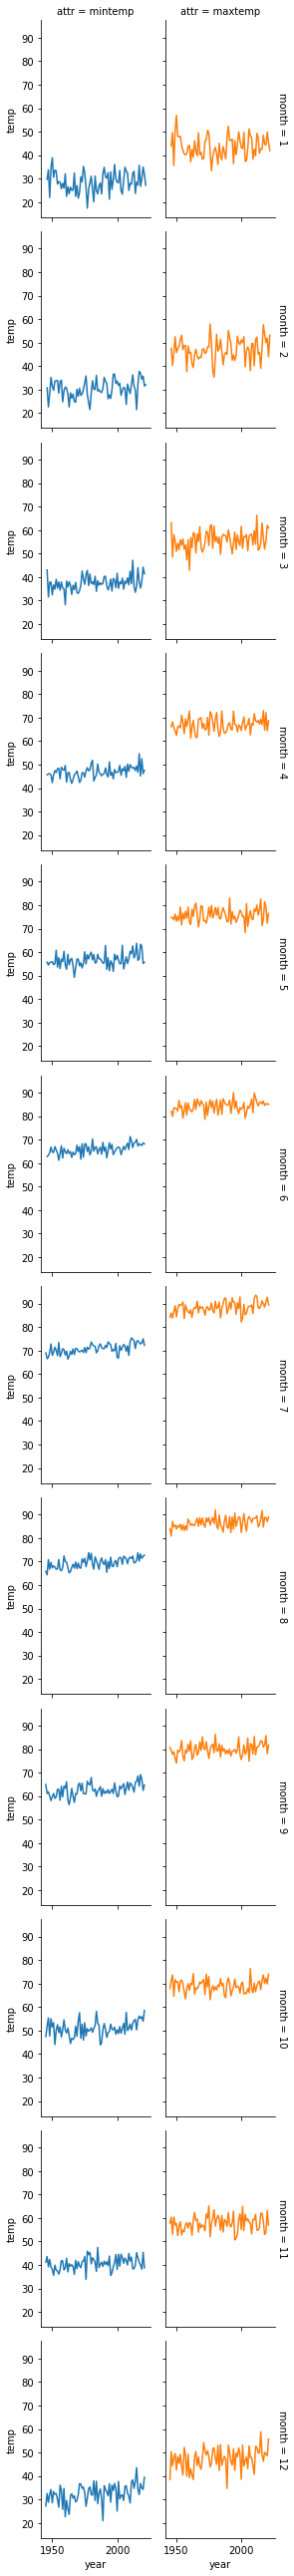

In [54]:
# 24 plots are formed using seaborn's facet search function
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(concat_df, row = 'month', col = 'attr', hue = 'attr', margin_titles = True, aspect = 0.7)
g.map(sns.lineplot, 'year', 'temp')
#plt.set_axis_labels('Year', 'Average Min Temp in F')
plt.show()

### After spanning all 24 combinations (12 months by max or min temps), it seems that the warmer months (both for daily lows and daily highs) had an outsized increase in temperature as compared to other months.   In general, summer months, seemed to have the greatest increase.

### Nevertheless, it is not clear as to whether this increase in summer temperatures in Washington DC over the 78 year period is attributed to global warming or just to urban sprawl, loss of trees and greenerly and the increase of the urban heat island effect caused by construction of new buildings and roads that replace greenery.  Answers to this question could be possibly answered by comparing this with the trendlines of Rochester NY in my accompanying study.

### A second observation is that most graphs showed a significant increase over the last 10 or so years, the increase often being equal to or more than the previous 65 years.  This shows that global warming may be accelerating, and that there is a positive reinforcement effect in place.
